# Grove I2C ADC module and Temperature Sensor V1.2
---

## Aim

* This notebook illustrates how to use available APIs for the Grove I2C ADC module on Kria Starter Kit PMOD interface.


## References
* [Grove I2C ADC](https://www.seeedstudio.com/Grove-I2C-ADC.html)    
* [PYNQ Grove Adapter](https://store.digilentinc.com/pynq-grove-system-add-on-board/)   
* [Grove Temperature Sensor V1.2](https://www.seeedstudio.com/Grove-Temperature-Sensor.html)   

## Last revised
* 03/04/2022
    + Initial version
---

## Load _base_ Overlay

<div class="alert alert-box alert-info">
Note that we load the base bitstream only once to use Grove module with PYNQ Grove Adapter and SEEED Grove Base Shield V2.0<br>
Please make sure you run the following cell before running either of the interfaces 
</div>

In [1]:
import math
from kv260 import BaseOverlay
from pynq_peripherals import PmodGroveAdapter
from pynq.lib.pmod import Grove_TMP
from pynq.lib.pmod import PMOD_GROVE_G3 # import constants
base = BaseOverlay('base.bit')

---
## Using Grove I2C ADC with PYNQ Grove Adapter (PMOD)

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Connect the PYNQ Grove Adapter to PMODA connector.  Connect the Grove I2C ADC module's J1 connector to the G3 connector of the Adapter.</li>
    <li>Connect an analog source on the signal input side (J2 connector) of the Grove I2C ADC module</li></ul>
</div>

### Adapter configuration

In [2]:
tmp = Grove_TMP(base.PMODA, PMOD_GROVE_G3)

### Read from sensor

In [3]:
temperature = tmp.read()
print("{0:.2f} degree Celsius".format(temperature))

23.42 degree Celsius


### Start logging once every 100ms for 10 seconds

In [4]:
import time
ms_delay = 100
delay_s = 10
tmp.set_log_interval_ms(ms_delay)
tmp.start_log()
time.sleep(delay_s) # Change input during this time
tmp_log = tmp.get_log()
print("Logged {} samples".format(len(tmp_log)))

Logged 150 samples


## Display graph of measurements

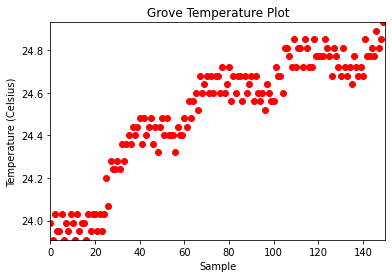

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(tmp_log)), tmp_log, 'ro')
plt.title('Grove Temperature Plot')
plt.xlabel('Sample')
plt.ylabel('Temperature (Celsius)')
min_tmp_log = min(tmp_log)
max_tmp_log = max(tmp_log)
plt.axis([0, len(tmp_log), min_tmp_log, max_tmp_log])
plt.show()

Copyright (C) 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----

----